<a href="https://colab.research.google.com/github/pedroblossbraga/BR-Stock-Forecast/blob/main/forecast_brazilian_stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import datetime

!pip install yfinance
import yfinance as yf

# https://finance.yahoo.com/quote/%5EBVSP/components/

symbols = [
           'FLRY3.SA',
            'ITSA4.SA',
            'ARZZ3.SA',
           'BPAC11.SA',#'BPAC11F.SA',
           'SQIA3.SA',#'SQIA3F.SA',
           'TAEE11.SA',#'TAEE11F.SA',
           'VIIA3.SA',
           'LAME4.SA',#'LAME4F.SA',
          'PETR4.SA',#'PETR4F.SA',
           'BRKM5.SA',#'BRKM5F.SA',
           'LREN3.SA',#'LREN3F.SA',
          'RADL3.SA',# 'RADL3F.SA',
           'ENBR3.SA',#'ENBR3F.SA',
           'EQTL3.SA',
           'WEGE3.SA'#'WEGE3F.SA'
]

In [2]:
# Checking if the data for each symbol was found.
for s in symbols:
  try:    
    _ = yf.download(s, start='2022-01-03', 
                    end='2022-01-10').head()
  except Exception as e:
    print('NOT FOUND FOR {}!! Exception: {}'.format(
        s, e
    ))

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [3]:
def get_stock_data(symbol,
                   start = None,
                   end = None,
                   t_delta_days = None,
                   verbose = False):
  if t_delta_days is None:
    t_delta = datetime.timedelta(days=2000)
  else:
    t_delta = datetime.timedelta(days=t_delta_days)

  if start is None:
    start = (datetime.datetime.now() - t_delta).strftime('%Y-%m-%d')

  if end is None:
    end = datetime.datetime.now().strftime('%Y-%m-%d')

  print('symbol: {}, start: {}, end: {}, delta: {}'.format(symbol, start, end, t_delta))
  df = yf.download(symbol, start=start, 
                    end=end)
  return df


get_stock_data(symbols[0], verbose = True)

symbol: FLRY3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-08,19.995001,20.000000,19.665001,19.799999,15.806341,609200
2016-09-09,19.740000,20.180000,19.600000,19.940001,15.918105,1304400
2016-09-12,19.924999,20.100000,19.639999,19.924999,15.906132,1302400
2016-09-13,19.965000,20.049999,19.405001,19.900000,15.886170,910400
2016-09-14,19.860001,20.004999,19.570000,19.840000,15.838280,531400
...,...,...,...,...,...,...
2022-02-21,18.190001,18.330000,17.730000,17.730000,17.730000,1301200
2022-02-22,17.990000,19.190001,17.930000,19.190001,19.190001,3062500
2022-02-23,19.160000,19.480000,18.740000,18.740000,18.740000,1864700


In [4]:
df = get_stock_data(symbols[0], verbose = True)
df.describe()

symbol: FLRY3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
count,1361.000000,1361.000000,1361.000000,1361.000000,1361.000000,1.361000e+03
mean,24.474346,24.832259,24.071583,24.441043,22.350128,1.878424e+06
std,3.725904,3.751287,3.688938,3.737718,3.602828,1.694782e+06
min,16.030001,16.510000,15.850000,15.890000,14.563584,0.000000e+00
25%,21.110001,21.440001,20.799999,21.075001,19.153097,1.194200e+06
50%,24.940001,25.290001,24.540001,24.910000,23.202576,1.610600e+06
75%,27.389999,27.770000,26.959999,27.350000,24.993952,2.231400e+06
max,33.500000,34.090000,32.730000,33.500000,31.390551,5.178200e+07


symbol: FLRY3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed


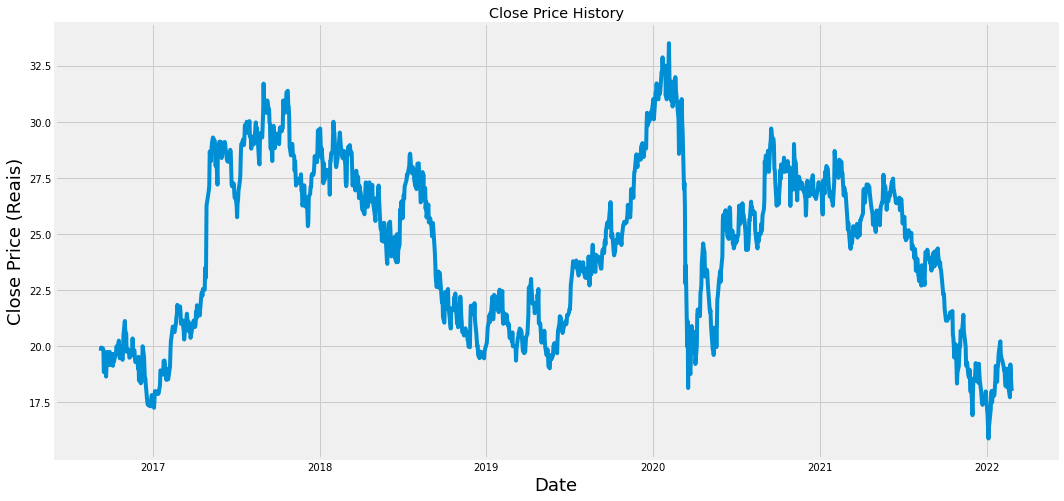

In [5]:
def plot_history(df):
  plt.figure(figsize=(16,8))
  plt.title('Close Price History')
  plt.plot(df['Close'])
  plt.xlabel('Date', fontsize=18)
  plt.ylabel('Close Price (Reais)', fontsize=18)
  plt.show()


plot_history(get_stock_data(symbols[0]))

symbol: FLRY3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 51s 44ms/step - loss: 0.0046


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


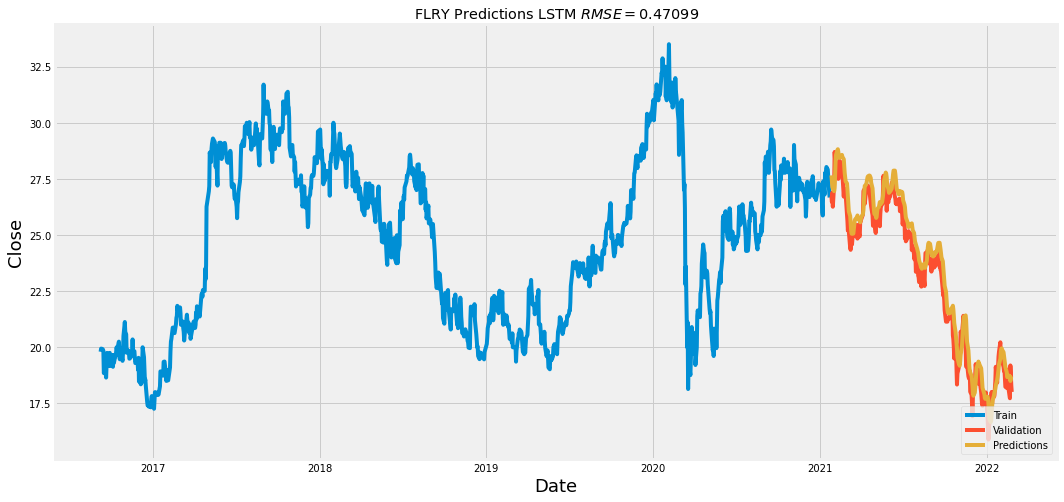

In [6]:
def get_train_test_data(
                  df,
                  scaler,
                  col='Close',
                  qtd_test=None,
                  verbose = False):
  
  if qtd_test is None:
    qtd_test = round(len(df)*0.3)


  # dataframe with only the close column
  data = df.filter(['Close'])
  # df -> np.array
  dataset = data.values
  # compute the N. of rows to train the model on
  training_data_len = math.ceil(len(dataset) * 0.8)

  if verbose:
    print('length of training data: ', training_data_len)


  # scale the data before it's presented to the neural net
  scaled_data = scaler.fit_transform(dataset)

  train_data = scaled_data[0:training_data_len, :]

  #split the data into X_train and y_train datasets
  x_train, y_train = [],[]

  for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i,0])

  x_train, y_train = np.array(x_train), np.array(y_train)

  test_data = scaled_data[training_data_len - 60:, :]

  # create the datasets x_test and y_test
  x_test = []
  y_test = dataset[training_data_len:,:]

  for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

  return x_train, y_train, x_test, y_test


def build_model(
                x_train, y_train, x_test, y_test,
                scaler
):

  # Build the LSTM model
  model = Sequential()
  model.add(LSTM(50, 
                 return_sequences=True, 
                 input_shape=(x_train.shape[1],1)))
  model.add(LSTM(50, 
                 return_sequences=False))
  model.add(Dense(25))
  model.add(Dense(1))

  # compile the model
  model.compile(optimizer='adam', 
                loss='mean_squared_error')

  # Train the model
  model.fit(x_train, y_train, 
            batch_size=1, 
            epochs=1)
  
  # get the models predicted price values
  predictions = model.predict(x_test)
  predictions = scaler.inverse_transform(predictions)

  return model, predictions
  

def plot_predictions(
                    data,
                     training_data_len,
                     predictions,
                     rmse,
                     col
                     ):
  train = data[:training_data_len]
  valid = data[training_data_len:]
  valid['Predictions'] = predictions

  #visualize the data
  plt.figure(figsize=(16,8))
  plt.title(r'FLRY Predictions LSTM $RMSE={:.5f}$'.format(rmse))
  plt.xlabel('Date', fontsize=18)
  plt.ylabel(col, fontsize=18)
  plt.plot(train[col])
  plt.plot(valid[[col, 'Predictions']])
  plt.legend(['Train', 'Validation', 'Predictions'], loc='lower right')
  plt.show()

def apply_model(s,
                col='Close',
                verbose = False,
                qtd_test=60):

  df = get_stock_data(s, verbose = verbose)

  training_data_len = math.ceil(len(df.values) * 0.8)

  scaler = MinMaxScaler(feature_range=(0,1))

  x_train, y_train, x_test, y_test = get_train_test_data(
                  df,
                  scaler,
                  col=col,
                  qtd_test=None,
                  verbose = verbose)
  

  model, predictions = build_model(
                            x_train, y_train, x_test, y_test,
                            scaler
                )
  
  rmse = np.sqrt(np.mean(predictions - y_test) ** 2)

  plot_predictions(
                    data=df,
                     training_data_len=training_data_len,
                     predictions=predictions,
                     rmse=rmse,
                     col=col
                     )
  return model

apply_model(symbols[0])

symbol: FLRY3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 38s 33ms/step - loss: 0.0058


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


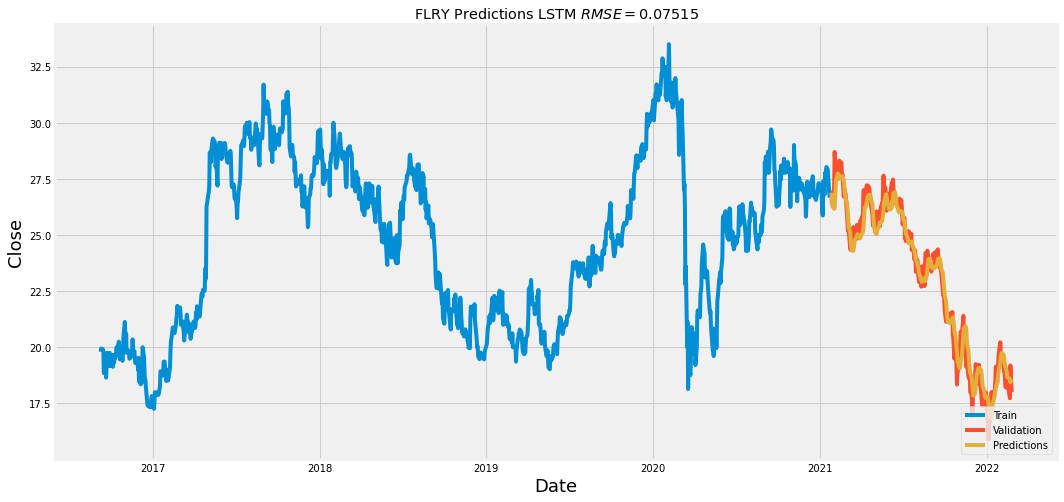

In [7]:
model = apply_model(symbols[0])

In [8]:
df = get_stock_data(s)
training_data_len = math.ceil(len(df.values) * 0.8)

scaler = MinMaxScaler(feature_range=(0,1))

x_train, y_train, x_test, y_test = get_train_test_data(
                df,
                scaler)

x_train

symbol: WEGE3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed


array([[0.02523408, 0.01830894, 0.02295731, ..., 0.00123324, 0.00246649,
        0.        ],
       [0.01830894, 0.02295731, 0.02077542, ..., 0.00246649, 0.        ,
        0.00313053],
       [0.02295731, 0.02077542, 0.02115487, ..., 0.        , 0.00313053,
        0.00616622],
       ...,
       [0.89320108, 0.82968897, 0.87544233, ..., 0.92538877, 1.        ,
        0.96781231],
       [0.82968897, 0.87544233, 0.87001602, ..., 1.        , 0.96781231,
        0.95671309],
       [0.87544233, 0.87001602, 0.88333508, ..., 0.96781231, 0.95671309,
        0.94376408]])

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-09-08,6.576923,6.623076,6.465384,6.584615,6.034505,5632900
2016-09-09,6.469230,6.511538,6.273076,6.303846,5.777193,6080620
2016-09-12,6.250000,6.538461,6.226923,6.492307,5.949910,4702880
2016-09-13,6.388461,6.492307,6.296153,6.403846,5.868838,5426200
2016-09-14,6.365384,6.446153,6.280769,6.419230,5.882938,4163380


In [12]:
scaler = MinMaxScaler(feature_range=(0,1))

# dataframe with only the close column
data = df.filter(['Close'])
# df -> np.array
dataset = data.values
# compute the N. of rows to train the model on
training_data_len = math.ceil(len(dataset) * 0.8)

# scale the data before it's presented to the neural net
scaled_data = scaler.fit_transform(dataset)

train_data = scaled_data[0:training_data_len, :]

#split the data into X_train and y_train datasets
x_train, y_train = [],[]

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

test_data = scaled_data[training_data_len - 60:, :]

# create the datasets x_test and y_test
x_test = []
y_test = dataset[training_data_len:,:]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

x_test = np.array(x_test)
#x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
x_test, x_test.shape

(array([[0.87001602, 0.88333508, 0.88937795, ..., 0.95671309, 0.94376408,
         0.96004291],
        [0.88333508, 0.88937795, 0.83881495, ..., 0.94376408, 0.96004291,
         0.9597962 ],
        [0.88937795, 0.83881495, 0.84979082, ..., 0.96004291, 0.9597962 ,
         0.95658984],
        ...,
        [0.66221434, 0.65777466, 0.66418758, ..., 0.59808562, 0.59093283,
         0.59117948],
        [0.65777466, 0.66418758, 0.66986049, ..., 0.59093283, 0.59117948,
         0.56824113],
        [0.66418758, 0.66986049, 0.67134033, ..., 0.59117948, 0.56824113,
         0.58599983]]), (272, 60))

In [13]:
x_test.shape

(272, 60)

In [14]:
# X = np.array([list(range(100))])
# N = 100
# X = np.reshape(X, (N, 60,1))
# model.predict(X)

symbol: ITSA4.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 40s 32ms/step - loss: 0.0057


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


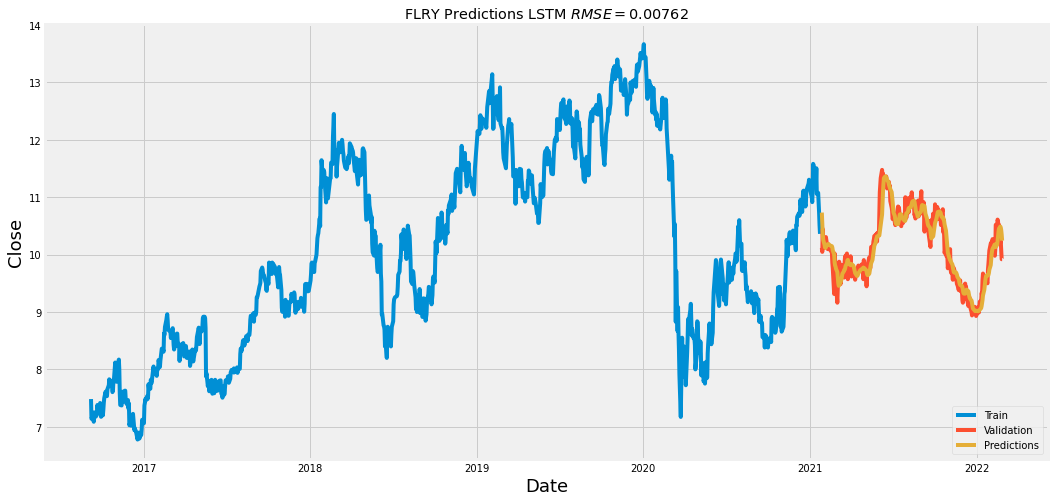

symbol: ARZZ3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 38s 33ms/step - loss: 0.0016


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


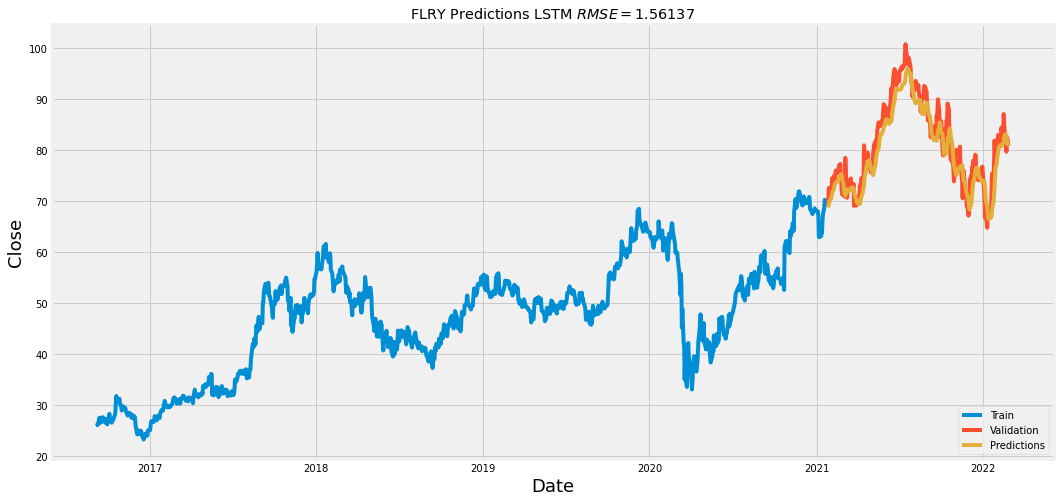

symbol: BPAC11.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
936/936 [==============================] - 35s 34ms/step - loss: 0.0026


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


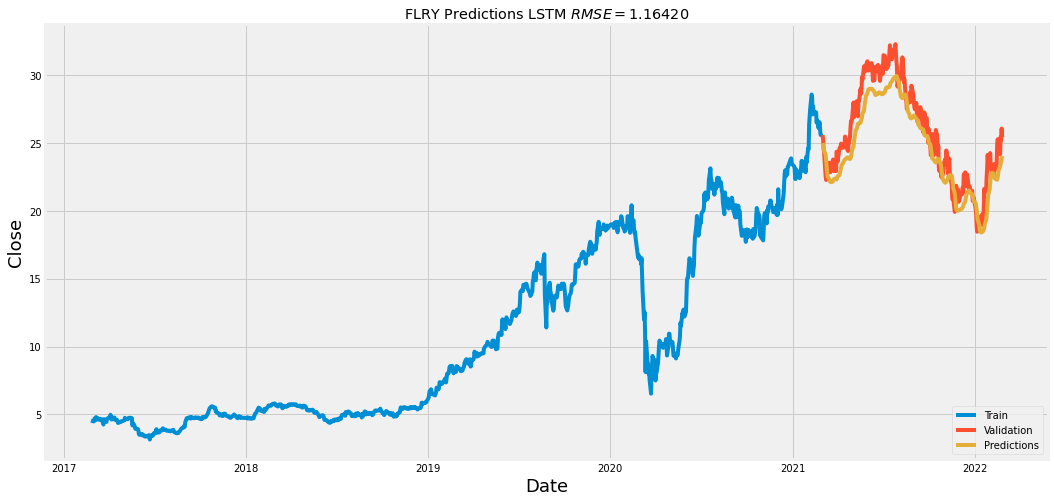

symbol: SQIA3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 39s 35ms/step - loss: 0.0030


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


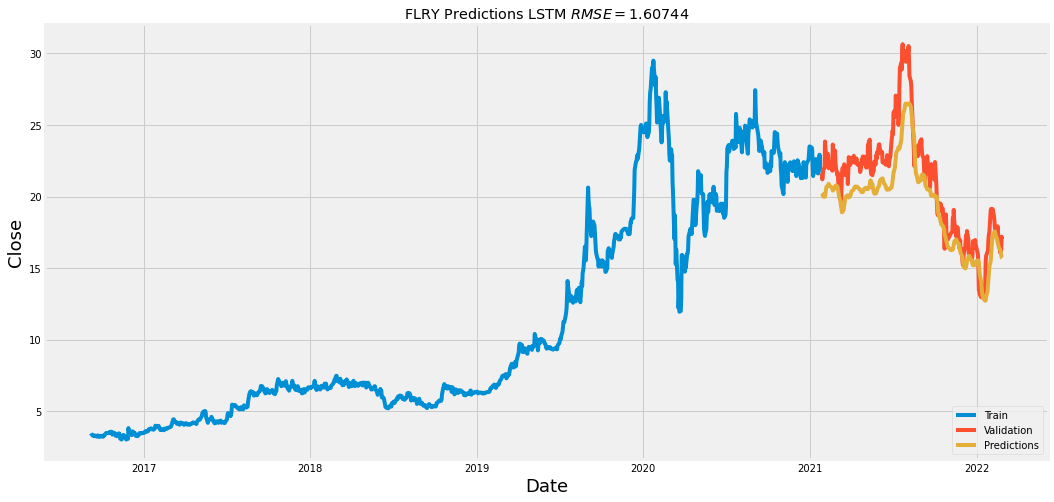

symbol: TAEE11.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 41s 36ms/step - loss: 0.0018


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


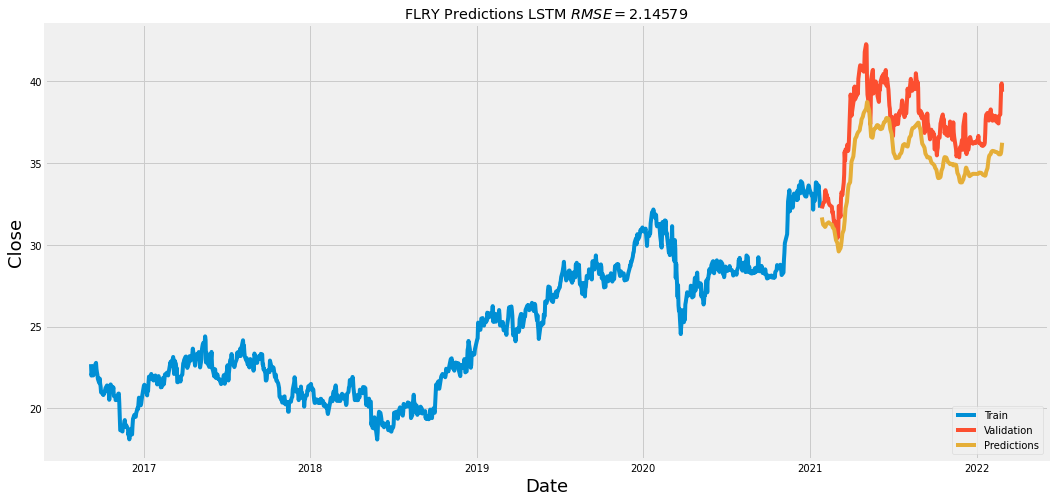

symbol: VIIA3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 40s 35ms/step - loss: 0.0035


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


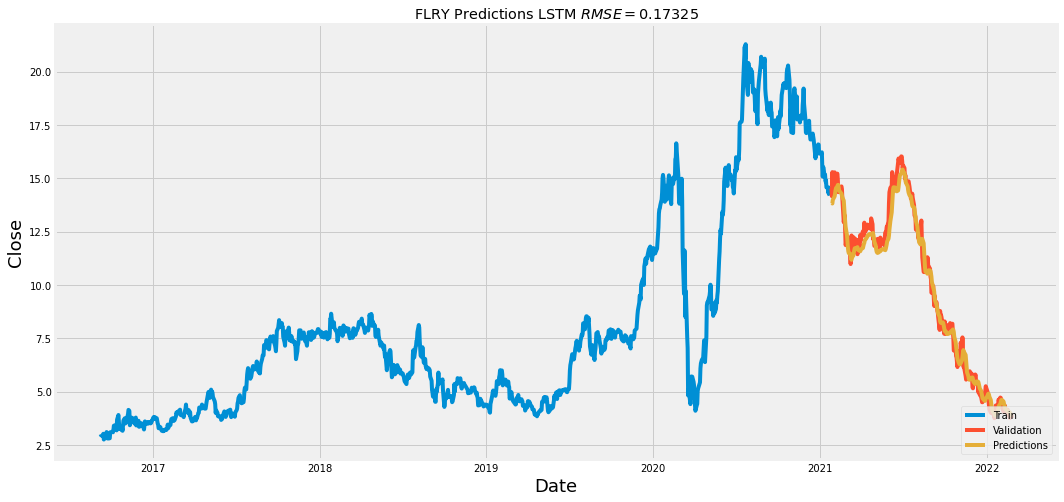

symbol: LAME4.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1009/1009 [==============================] - 40s 35ms/step - loss: 0.0033


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


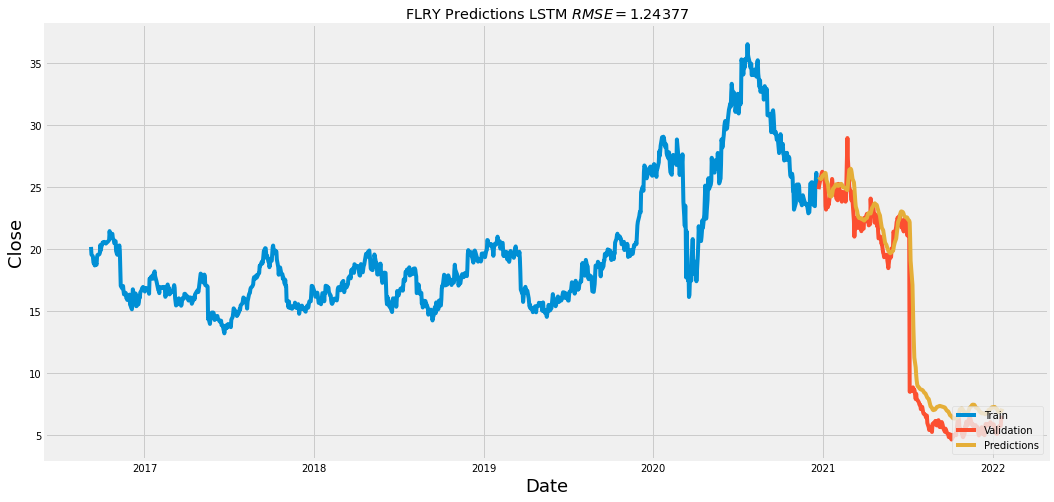

symbol: PETR4.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 40s 35ms/step - loss: 0.0055


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


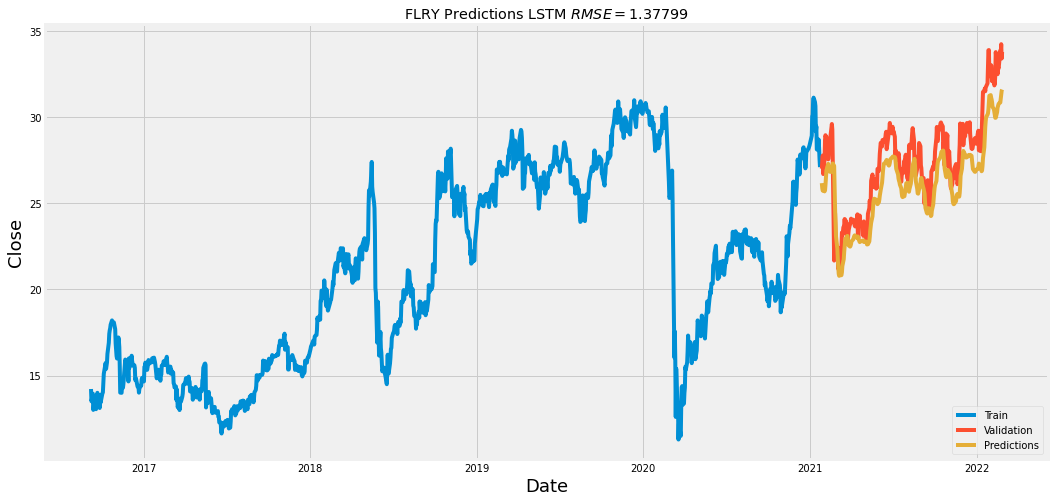

symbol: BRKM5.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 42s 36ms/step - loss: 0.0030


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


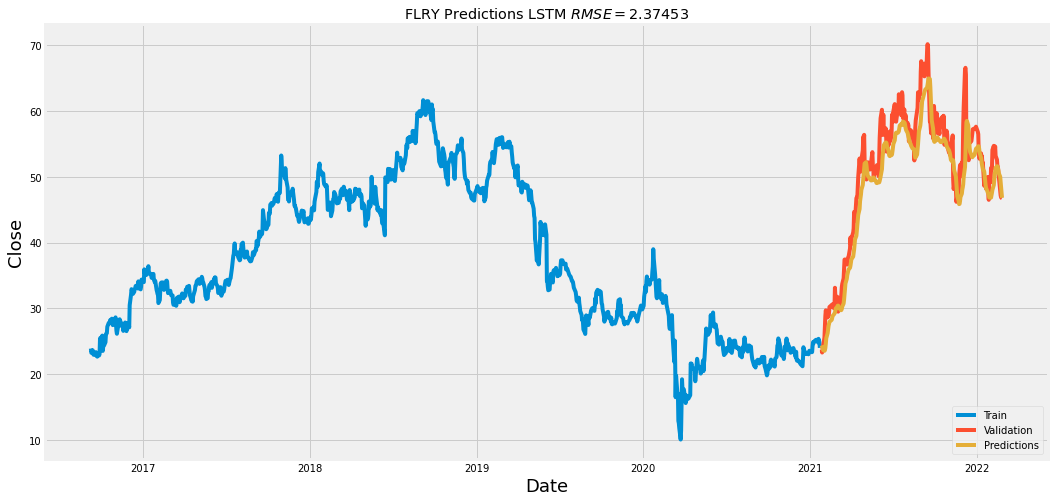

symbol: LREN3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 41s 36ms/step - loss: 0.0037


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


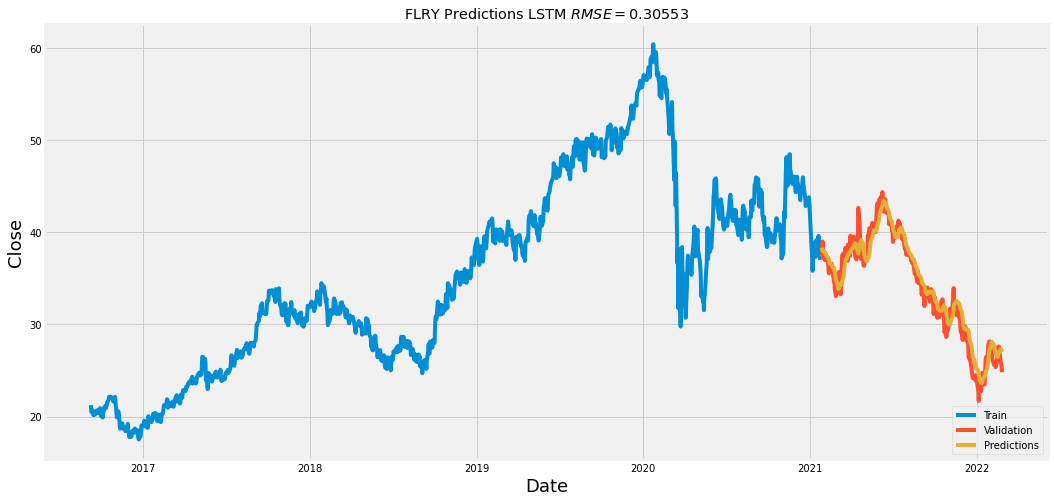

symbol: RADL3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 42s 36ms/step - loss: 0.0034


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


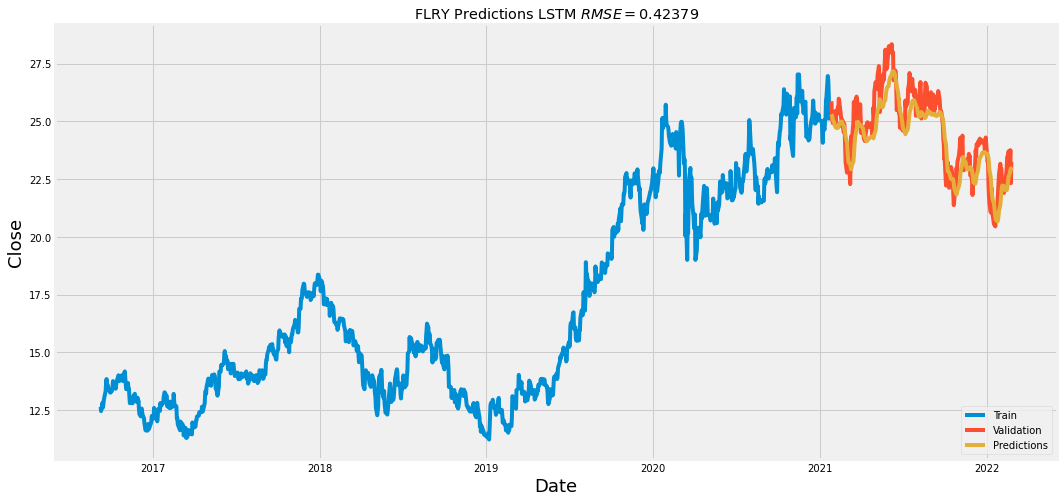

symbol: ENBR3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 42s 37ms/step - loss: 0.0043


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


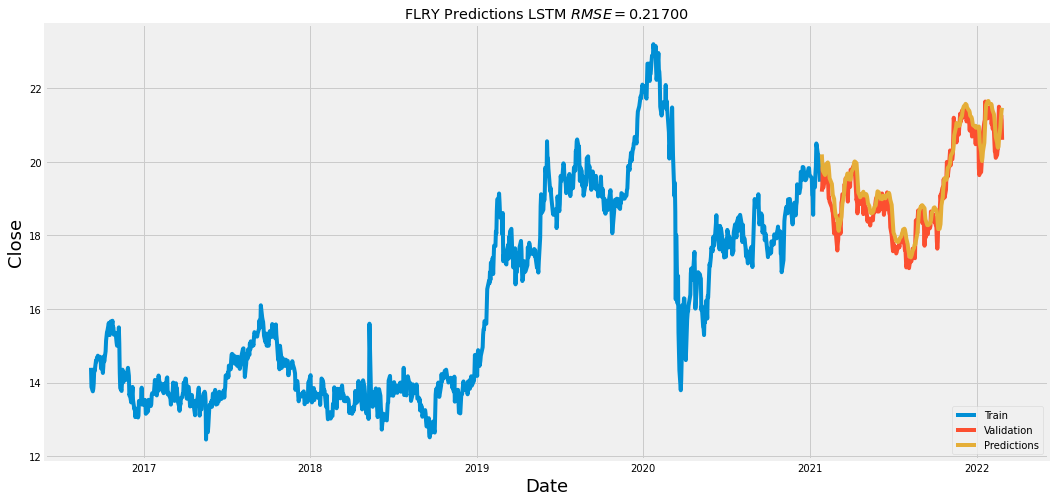

symbol: EQTL3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 43s 37ms/step - loss: 0.0037


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


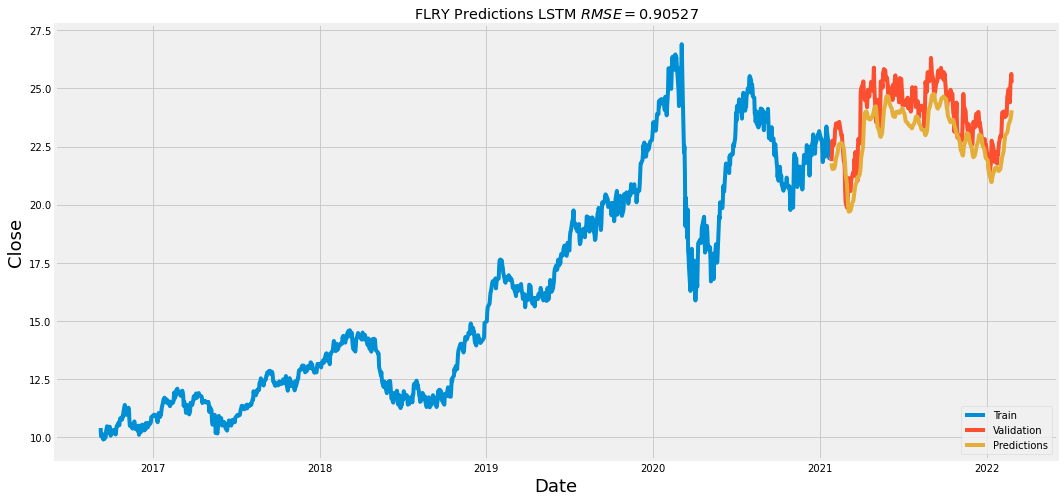

symbol: WEGE3.SA, start: 2016-09-07, end: 2022-02-28, delta: 2000 days, 0:00:00
[*********************100%***********************]  1 of 1 completed
1029/1029 [==============================] - 41s 37ms/step - loss: 0.0027


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:92: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


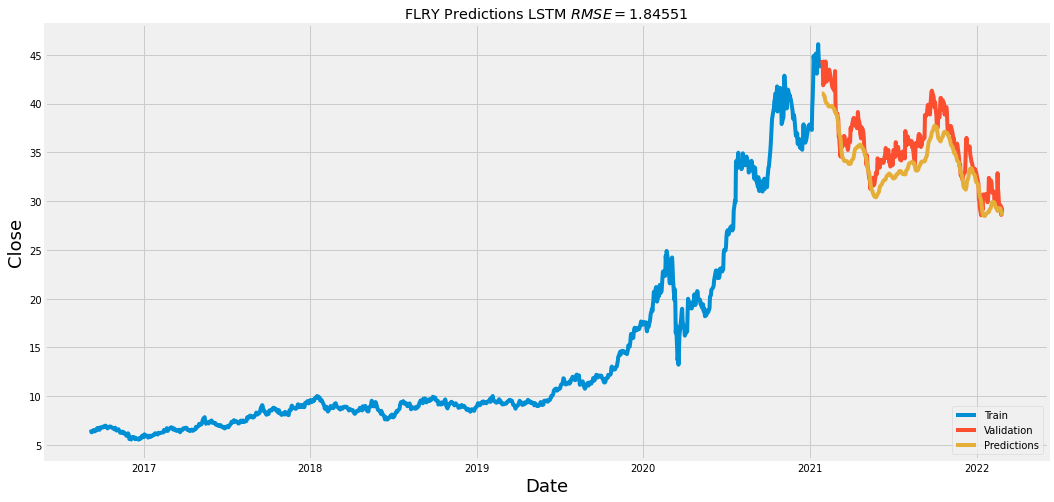

In [15]:
for s in symbols[1:]:
  apply_model(s)

## Prophet

In [ ]:
!pip install fbprophet

In [ ]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly
from plotly import graph_objs as go

def prophet_forecast(
                      data,
                     n_years = 1
                     ):
  
  period = n_years * 365

  data['Date'] = data.index
  data.reset_index(drop=True, inplace = True)

  df_train = data[['Date', 'Close']]
  df_train = df_train.rename(
      columns = {'Date': 'ds',
                 'Close': 'y'}
  )

  m = Prophet()
  m.fit(df_train)
  future = m.make_future_dataframe(periods = period)

  y_hat = m.predict(future)
  
  return y_hat, m


df = get_stock_data(symbols[0])

y_hat, m = prophet_forecast(df)

plot_plotly(m, y_hat)
plt.show()

m.plot_components(y_hat)
plt.show()


In [ ]:
y_hat

In [ ]:
df.head(), df.tail()

In [ ]:
import plotly.graph_objs as go
import plotly.io as pio
import plotly
import plotly.offline as py

def plot_candles(df, s):
  trace = go.Candlestick(x=df['Date'],
                         open=df['Open'],
                         high=df['High'],
                         low=df['Low'],
                         close=df['Close'])
  layout = go.Layout(
      title= f'Candlestick ({s})',
      title_x = 0.5,
      xaxis = dict(
          rangeslider = dict(
              visible = False
          )
      )
  )
  data = [trace]

  fig = go.Figure(data=data, layout=layout)
  py.iplot(fig)

plot_candles(df, symbols[0])

In [ ]:
def plot_forecast(y_hat,
                  period=365):
  plt.figure(figsize=(15,4))
  plt.title('Predictions',
            fontsize = 18)

  plt.plot(y_hat[['ds']], y_hat[['yhat']],
          label=r'$y$',
          color='blue')

  plt.plot(y_hat[['ds']], y_hat[['trend']],
          label='trend',
          color='orange')

  plt.fill_between(
      y_hat['ds'][-period:],
      y_hat['yhat_lower'][-period:],
      y_hat['yhat_upper'][-period:],
      color='blue',
      alpha=0.3
  )
  plt.legend(loc='best',
            fontsize=18)
  plt.show()

plot_forecast(y_hat)

In [ ]:
df